### P2 : Analysis of  Baseball data set 

In this project I intend to investigate the dataset from Lahman's baseball Database.This dataset contains complete pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2015.It includes data from
the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875.

Using the Pandas, Numpy, Matplotlib and Statsmodel libraries of Python , the following points have been addressed:

1. The trend in the total salaries of Major League Baseball teams on yearly basis.
2. The relationship between Salaries and No. of Wins of a team in a particluar year.
3. Correlation between runs scored and other stats i.e BA, OBP, SLG and OPS, to figure out the best player evaluation strategy.

In [30]:
# Import all the libraries
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from matplotlib.ticker import FuncFormatter

import statsmodels.api as sm
import statsmodels.formula.api as smf

path='C:/Users/USER/Downloads/baseballdatabank-master_2016-03-02/baseballdatabank-master/core'

In [4]:
# Read the csv file for Teams table
Teams=pd.read_csv(path+'/Teams.csv')

In [5]:
# Selecting the required columns and data for year since 1985
Teams=Teams[['yearID','teamID','Rank','R','RA','G','W','H','BB','HBP','AB','SF','HR','2B','3B']]
Teams=Teams[Teams.yearID >=1985]

In [6]:
# Setting yearID and teamID as the index for the teams table
Teams=Teams.set_index(['yearID','teamID'])

In [7]:
# Reading the Salaries table
Salaries=pd.read_csv(path+'/Salaries.csv')

In [8]:
# Checking the unique yearIDs in salaries table
Salaries.yearID.unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [9]:
# Applying a group by operation on the Salaries dataframe to add the salaries per year and per team
salary_Peryear_Perteam=Salaries.groupby(['yearID','teamID'])['salary'].sum()

In [10]:
# Merging the Teams dataframe with the above salary_Peryear_Perteam series object
Teams=Teams.join(salary_Peryear_Perteam)

In [11]:
# Function to plot the total Salary of the different teams per year

def salaryinmillions(x,pos):
    return '%1.1f' % (x*1e-6)

Formatter =FuncFormatter(salaryinmillions)

def plotting_MLB_Team_salaries(year):
    fig,ax=plt.subplots()
    Teams['salary'][year].sort_values(ascending=True).plot(kind='bar',figsize=(8,8))
    ax.yaxis.set_major_formatter(Formatter)
    plt.ylabel('Salaries in Million Dollars',fontsize=18)
    plt.xlabel('MLB Teams',fontsize=18)
    plt.title('MLB Team Salaries for '+str(year) , fontsize=20)
    


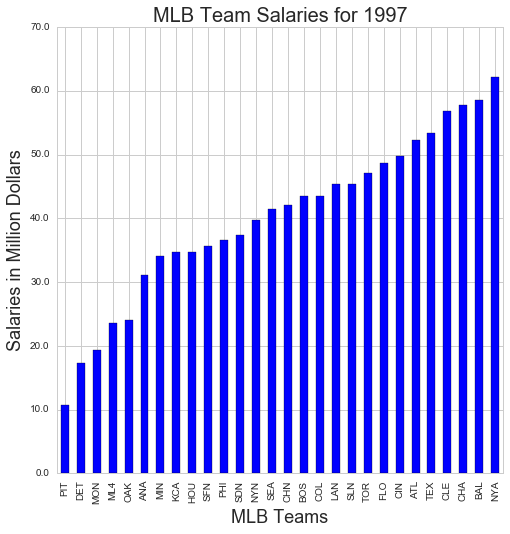

In [12]:
# Invoking the function to check the trend of total salary of different teams in the year 1997
plotting_MLB_Team_salaries(1997)

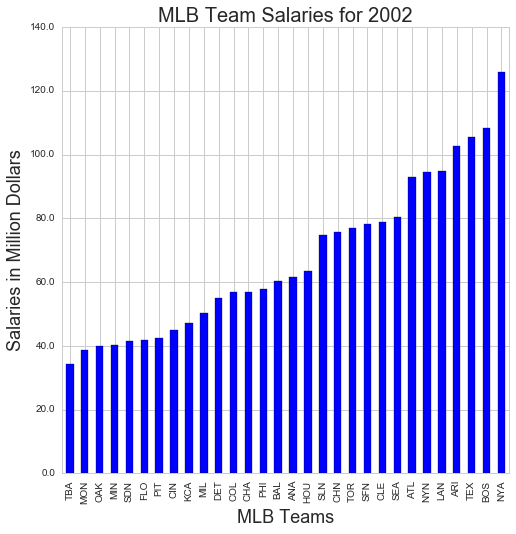

In [13]:
#Lets check the trend for the year 2002
plotting_MLB_Team_salaries(2002)

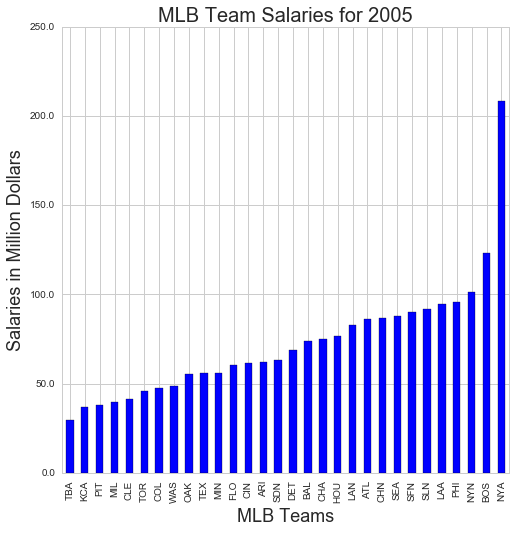

In [14]:
# Likewise for 2005
plotting_MLB_Team_salaries(2005)

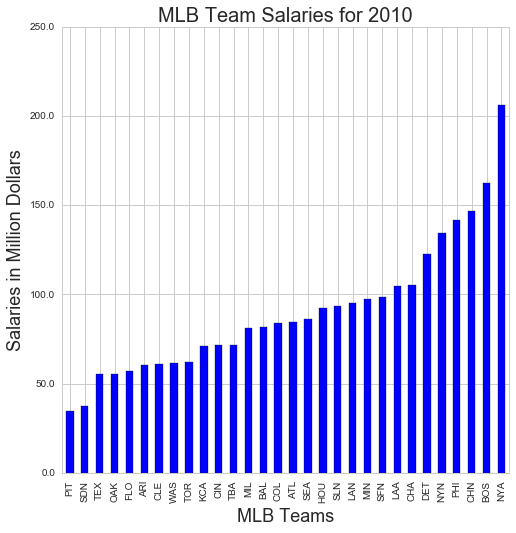

In [15]:
# Lets take a glance at 2010 as well
plotting_MLB_Team_salaries(2010)

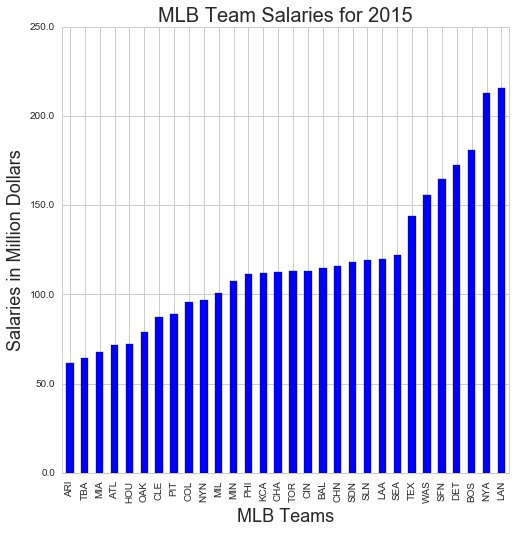

In [16]:
# And Finally for last year 2015 
plotting_MLB_Team_salaries(2015)

The above graphs depict the trend in the total salaries of various teams for the years 1997,2002,2005,2010 and 2015.Observing the total Salary of the teams (Detroit Tigers, Oakland Athletics, New York Yankees, and Boston Red Sox), we can say there is an gradual increase in their total values from 1997 to 2015. Looking at New York Yankees their total salary increased from around \$62 Million in 1997 to more than \$200 Million in 2015.The team Boston Red Sox has had similar trend from around \$42 Million to more than \$150 Million in 2015. Also the Detroit tigers and Oakland Athletics have seen such surges.


Let's explore whether the No. of wins of these teams have also seen such upward trend, or it has just been their payrolls.

In [17]:
'''
The following lines of codes is a function for scatter plot of the total salary of the MLB Teams versus their No. of wins per year.
The teams Oakland Athletics,Detroit Tigers,New York Yankees and Boston Red Sox have been annotated specifically as we have studied
the trend in their total salaries.Different size of the bubbles and color schemes have been used to differentiate them.

'''

def salary_versus_wins(Teams,year):
    Teams_Byyear=Teams.xs(year)
    fig,ax=plt.subplots()
    for i in Teams_Byyear.index:
        if i == 'OAK':
            ax.scatter(Teams_Byyear['salary'][i],Teams_Byyear['W'][i],color='#FFFF00',s=100)
            ax.annotate(i,(Teams_Byyear['salary'][i],Teams_Byyear['W'][i]),
                       bbox=dict(boxstyle='round',color='#FFFF00'),
                       xytext=(-30,30),textcoords='offset points',
                       arrowprops=dict(arrowstyle='->',connectionstyle='angle,angleA=30,angleB=90,rad=10'))
        elif i == 'BOS':
            ax.scatter(Teams_Byyear['salary'][i],Teams_Byyear['W'][i],color='#0099FF',s=100)
            ax.annotate(i,(Teams_Byyear['salary'][i],Teams_Byyear['W'][i]),
                        bbox=dict(boxstyle='round',color='#0099FF'),
                        xytext=(-30,30),textcoords='offset points',
                        arrowprops=dict(arrowstyle='->',connectionstyle='angle,angleA=0,angleB=90,rad=10'))
        elif i == 'NYA':
            ax.scatter(Teams_Byyear['salary'][i],Teams_Byyear['W'][i],color='#FF6666',s=100)
            ax.annotate(i,(Teams_Byyear['salary'][i],Teams_Byyear['W'][i]),
                       bbox=dict(boxstyle='round',color='#FF6666'),
                       xytext=(-30,-30),textcoords='offset points',
                       arrowprops=dict(arrowstyle='->',connectionstyle='angle,angleA=0,angleB=90,rad=10'))
            
        elif i == 'DET':
            ax.scatter(Teams_Byyear['salary'][i],Teams_Byyear['W'][i],color='#4DDB94',s=100)
            ax.annotate(i,(Teams_Byyear['salary'][i],Teams_Byyear['W'][i]),
                       bbox=dict(boxstyle='round',color='#4DDB94'),
                       xytext=(-30,30),textcoords='offset points',
                       arrowprops=dict(arrowstyle='->',connectionstyle='angle,angleA=0,angleB=90,rad=10'))
        else:
            ax.scatter(Teams_Byyear['salary'][i],Teams_Byyear['W'][i],color='purple',s=60)    
     
    ax.xaxis.set_major_formatter(Formatter)
    ax.tick_params(axis='x',labelsize=12)
    ax.tick_params(axis='y',labelsize=12)
    ax.set_xlabel('Salaries in Million dollars',fontsize=15)
    ax.set_ylabel('No.of Wins',fontsize=15)
    ax.set_title('Salaries versus Wins:' + str(year), fontsize=20, fontweight='bold')
    plt.show()

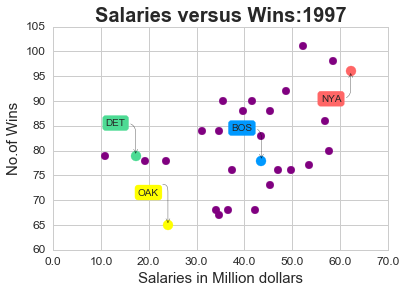

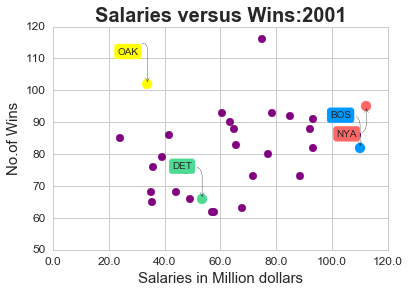

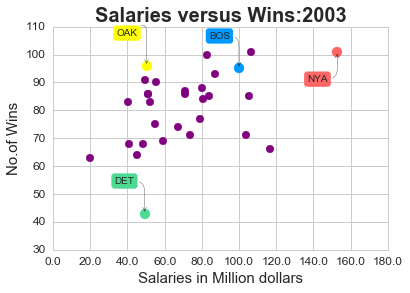

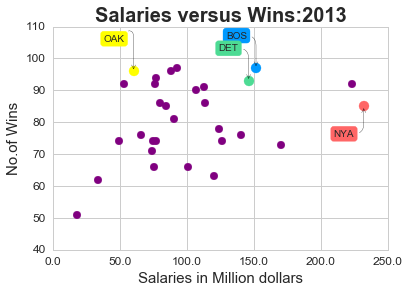

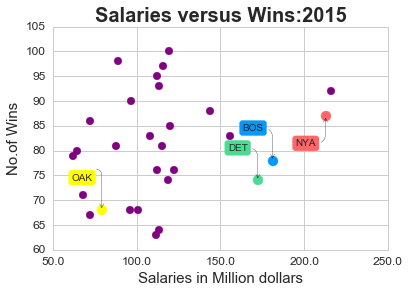

In [18]:
'''
The following lines of codes invoke the above function to show the relationship between and Total Salary and No.of Wins for the
years 1997,2002,2005,2010,2015

'''

salary_versus_wins(Teams,1997)
salary_versus_wins(Teams,2001)
salary_versus_wins(Teams,2003)
salary_versus_wins(Teams,2013)
salary_versus_wins(Teams,2015)

From the above scatter graphs we can see that the performance of New York Yankees have deteriorated from the year 1997 to 2015. Their team salary has had an upward trend, but their no. of wins has gone down all these years.The performance of Detroit Tigers degraded from 1997 till 2003 , but it came in competition in 2013 with the increment in their salary as well. But looks like the year 2015 has been bad for Detroit Tigers too in terms of their no. of wins.Oakland Atheltics went from being an underperformer in 1997 to becoming a fairly competitive squad in 2013 with higher no. of wins than New york Yankees,but their performance also came down in the year 2015.


**The above visualizations certainly depict that higher payroll does not mean higher performance(winning percentage) and What should be the evaluation criteria of the team's or player's performance in modern day baseball games??**

Going further in the exploration of the baseball dataset, I will base my analysis, referring to the book **Moneyball: The art of winning an unfair game**, published by Michael Lewis in 2003. This book is all about Oakland Athletics's General Manager Billy Beane's approach to evaluate and assemble a competitive baseball team.

Earlier in 19th Century Henry Chadwick devised baseball's box score considered Batting Average(BA) as best representation of batter's offensive skills.Statistical measures such as stolen bases, runs batted in and batting average were used to gauge the performance of the players.But these stats are 19th century view of the baseball game.

In the contemporary baseball seasons, OPS (On Base Plus Slugging Percentage) has gained popularity and represents more analytical and evidence based approach of Bill Beane used by modern teams to improve their runs scored.

Batting Average(BA) : It is defined as no. of Hits divided by at bats. 
                       
                   BA = H/AB
                       
On Base Percentage(OBP) : It denotes how often a batter reached base for any reason other than a fielding error,fielder's choice,fielder's obstruction,dropped third strike or catcher's interference.

                   
                   OBP = (H+BB+HBP)/(AB+BB+HBP+SF)
                   
                   
Slugging Percentage (SLG) : It denotes the power of a hitter.


                   SLG = H+2B+(2*3B)+(3*HR)/AB
                       
                       
OPS(On Base Plus Slugging Percentage) : It is the sum of OBP and SLG.
  
  
                   OPS = OBP + SLG

Going further , I will be reading the csv file for Teams table and calculate the above statistics for each team and each year since 2010.

In [19]:
# The following lines of code read the csv file into a dataframa and data is included only for years after 2010.
# yearID and teamID has been set as index of the dataframe
MLB_Teams=pd.read_csv(path+'/Teams.csv')
MLB_Teams=MLB_Teams[MLB_Teams.yearID >2010]
MLB_Teams=MLB_Teams[['yearID','teamID','Rank','R','RA','G','W','H','BB','HBP','AB','SF','HR','2B','3B']]
MLB_Teams=MLB_Teams.set_index(['yearID','teamID'])
MLB_Teams.head()

Rank    R   RA    G   W     H   BB  HBP    AB  SF   HR   2B  3B
yearID teamID                                                                 
2011   ARI        1  731  662  162  94  1357  531   61  5421  33  172  293  37
       ATL        2  641  605  162  89  1345  504   28  5528  30  173  244  16
       BAL        5  708  860  162  69  1434  452   52  5585  43  191  273  13
       BOS        3  875  737  162  90  1600  578   50  5710  50  203  352  35
       CHA        3  654  706  162  79  1387  475   84  5502  46  154  252  16

In [20]:
'''
The following code adds the columns for Batting Average,On Base Percentage, Slugging Percentage and On Base Plus Slugging Percentage
to the dataframe
'''

MLB_Teams['BA']=(MLB_Teams['H'])/(MLB_Teams['AB'])
MLB_Teams['OBP']=(MLB_Teams['H']+MLB_Teams['BB']+MLB_Teams['HBP'])/(MLB_Teams['AB']+MLB_Teams['BB']+MLB_Teams['HBP']+MLB_Teams['SF'])
MLB_Teams['SLG']=(MLB_Teams['H']+MLB_Teams['2B']+(2*MLB_Teams['3B'])+(3*MLB_Teams['HR']))/(MLB_Teams['AB'])
MLB_Teams['OPS']=MLB_Teams['OBP']+MLB_Teams['SLG']

In [21]:
# Lets take a quick glance whether the columns have been added.
MLB_Teams.head()

Rank    R   RA    G   W     H   BB  HBP    AB  SF   HR   2B  \
yearID teamID                                                                
2011   ARI        1  731  662  162  94  1357  531   61  5421  33  172  293   
       ATL        2  641  605  162  89  1345  504   28  5528  30  173  244   
       BAL        5  708  860  162  69  1434  452   52  5585  43  191  273   
       BOS        3  875  737  162  90  1600  578   50  5710  50  203  352   
       CHA        3  654  706  162  79  1387  475   84  5502  46  154  252   

               3B        BA       OBP       SLG       OPS  
yearID teamID                                              
2011   ARI     37  0.250323  0.322362  0.413208  0.735570  
       ATL     16  0.243307  0.308210  0.387120  0.695330  
       BAL     13  0.256759  0.316047  0.412892  0.728939  
       BOS     35  0.280210  0.348779  0.460771  0.809550  
       CHA     16  0.252090  0.318651  0.387677  0.706328

### Ordinary Least Square Regression using Statsmodel 

Statsmodel library in Python provides extensive function to explore data, estimate statistical model fits and perform
statistical tests.Let's do linear regression modelling using OLS module of statsmodel to evaluate which of the following stats(BA,OBP,SLG or OPS) have higher correlation with runs scored and can be used more reliably to predict runs.

I am using four different models to check the Adjusted R-Squared values using the following:

1. Batting Average(BA)
2. On Base Percentage(OBP)
3. Slugging Percentage
4. On Base Plus Slugging Percentage


                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           2.76e-28
Time:                        22:09:46   Log-Likelihood:                -781.59
No. Observations:                 150   AIC:                             1567.
Df Residuals:                     148   BIC:                             1573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -446.8544     82.162     -5.439      0.0

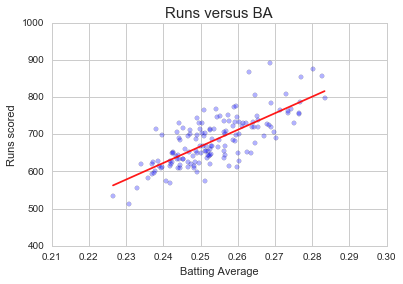

In [22]:
# OLS using Batting Average
Y=MLB_Teams.R
X=MLB_Teams.BA
X=sm.add_constant(X)
Model_BA=sm.OLS(Y,X)
Result_BA=Model_BA.fit()
print Result_BA.summary()


# Lets have a look at how scattered is Run versus BA graph
X_prime=np.linspace(X.BA.min(),X.BA.max(),100)[:,np.newaxis]
X_prime=sm.add_constant(X_prime)
Y_hat=Result_BA.predict(X_prime)

plt.scatter(X.BA,Y,alpha=0.3)
plt.xlabel("Batting Average")
plt.ylabel("Runs scored")
plt.plot(X_prime[:,1],Y_hat,'r',alpha=0.9)
plt.title("Runs versus BA", fontsize=15)

Pretty Scattered distribution using Batting Average. Lets move on to the next model..

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     336.1
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           6.43e-40
Time:                        23:16:09   Log-Likelihood:                -754.55
No. Observations:                 150   AIC:                             1513.
Df Residuals:                     148   BIC:                             1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -851.5373     83.773    -10.165      0.0

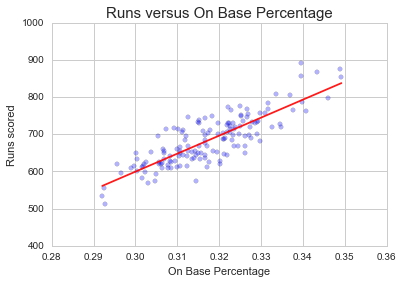

In [23]:
# OLS using On Base Percentage
Y=MLB_Teams.R
X=MLB_Teams.OBP
X=sm.add_constant(X)
Model_OBP=sm.OLS(Y,X)
Result_OBP=Model_OBP.fit()
print Result_OBP.summary()

# Lets check the scatter here
X_prime_1=np.linspace(X.OBP.min(),X.OBP.max(),100)[:,np.newaxis]
X_prime_1=sm.add_constant(X_prime_1)
Y_hat_1=Result_OBP.predict(X_prime_1)

plt.scatter(X.OBP,Y,alpha=0.3)
plt.xlabel("On Base Percentage")
plt.ylabel("Runs scored")
plt.plot(X_prime_1[:,1],Y_hat_1,'r',alpha=0.9)
plt.title("Runs versus On Base Percentage",fontsize=15)

Looks like On Base Percentage has better correlation with Run scored as it has tighter scatter of the points as compared to batting average.

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     646.7
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           7.00e-56
Time:                        23:19:55   Log-Likelihood:                -717.38
No. Observations:                 150   AIC:                             1439.
Df Residuals:                     148   BIC:                             1445.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -317.2616     39.415     -8.049      0.0

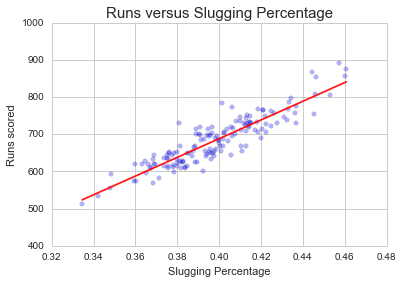

In [24]:
# OLS using Slugging Percenatge
Y=MLB_Teams.R
X=MLB_Teams.SLG
X=sm.add_constant(X)
Model_SLG=sm.OLS(Y,X)
Result_SLG=Model_SLG.fit()
print Result_SLG.summary()

# Scatter plot of Slugging Percenatge
X_prime_2=np.linspace(X.SLG.min(),X.SLG.max(),100)[:,np.newaxis]
X_prime_2=sm.add_constant(X_prime_2)
Y_hat_2=Result_SLG.predict(X_prime_2)

plt.scatter(X.SLG,Y,alpha=0.3)
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs scored")
plt.plot(X_prime_2[:,1],Y_hat_2,'r',alpha=0.9)
plt.title("Runs versus Slugging Percentage",fontsize=15)

Well ...Slugging Percentage looks even better correlated with runs scored when compared to OBP alone.So, lets use the combination of SLG and OBP to do a model fit.

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1030.
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           1.54e-68
Time:                        23:21:24   Log-Likelihood:                -687.87
No. Observations:                 150   AIC:                             1380.
Df Residuals:                     148   BIC:                             1386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -655.2148     41.757    -15.691      0.0

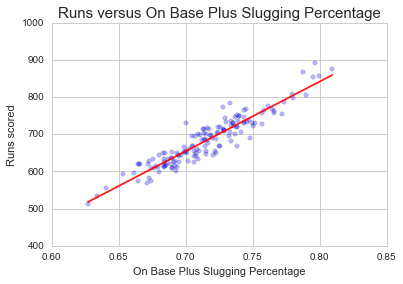

In [25]:
# OLS using OPS i.e OBP + SLG
Y=MLB_Teams.R
X=MLB_Teams.OPS
X=sm.add_constant(X)
Model_OPS=sm.OLS(Y,X)
Result_OPS=Model_OPS.fit()
print Result_OPS.summary()

# And the scatter plot
X_prime_3=np.linspace(X.OPS.min(),X.OPS.max(),100)[:,np.newaxis]
X_prime_3=sm.add_constant(X_prime_3)
Y_hat_3=Result_OPS.predict(X_prime_3)

plt.scatter(X.OPS,Y,alpha=0.3)
plt.xlabel("On Base Plus Slugging Percentage")
plt.ylabel("Runs scored")
plt.plot(X_prime_3[:,1],Y_hat_3,'r',alpha=0.9)
plt.title("Runs versus On Base Plus Slugging Percentage",fontsize=15)

Notice that OPS data are tighter on the line than the BA data.It looks like OPS data are in some manner better represented by the red regression line than the BA data are.

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 23 Mar 2016   Prob (F-statistic):           2.71e-20
Time:                        23:24:08   Log-Likelihood:                -800.12
No. Observations:                 150   AIC:                             1604.
Df Residuals:                     148   BIC:                             1610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        464.6993     20.736     22.411      0.0

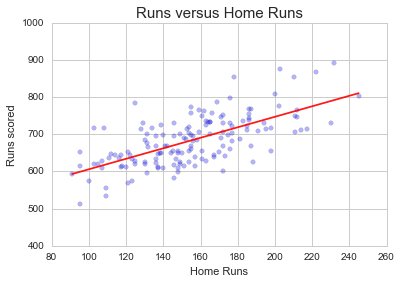

In [26]:
# Lets do OLs model fit using for other stats like homeruns
X=MLB_Teams.HR
Y=MLB_Teams.R
X=sm.add_constant(X)
Model_HR=sm.OLS(Y,X)
Result_HR=Model_HR.fit()
print Result_HR.summary()


# Check the scatter of homeruns versus Run scored
X_prime_4=np.linspace(X.HR.min(),X.HR.max(),100)[:,np.newaxis]
X_prime_4=sm.add_constant(X_prime_4)
Y_hat_4=Result_HR.predict(X_prime_4)

plt.scatter(X.HR,Y,alpha=0.3)
plt.xlabel("Home Runs")
plt.ylabel("Runs scored")
plt.plot(X_prime_4[:,1],Y_hat_4,'r',alpha=0.9)
plt.title("Runs versus Home Runs",fontsize=15)


Home runs correlates the lowest with Runs scored as shown by lowest Adjusted R-squared.The graph looks quite scattered as well.

### Conclusion

Combining the OLS Regression results of all the models, we can see that OPS model has the highest Adjusted-R squared value of 0.873 and HR model has the lowest Adjusted R-squared value of 0.435. R-squared value is a measure of how well the data are fit by a line.R-squared value of 1 means all the data lie on one line where as R-squared value of 0 means data are scattered and completely random.

If we observe the tightness of the plots, it can be said that Run versus OPS plot is more likely to be on a line than any other model say BA or HR.That means the scatter is less random or tighter in Run versus OPS and OPS correlates better with Runs scored than any other model.Hence, knowing a team's OPS will tell more about their runs scored than knowing their BA or HR will.

Now the question is why don't we just look at the team's run scored rather than predicting it with OPS or any other stat.This is 
because we are required to understand which stats tell us better about individual player's contribution to the team's run scored.Run scored or RBI depend on factors beyond player's control.But stats like BA,OBP,SLG and OPS are very much under player's control.So, if we find out the stat which correlates the best with runs scored we can evaluate the contribution and hence performance of indivdual players towards team's success.

The above analysis shows that out of the BA, HR, OBP ,SLG and OPS , OPS correlates the best with run scored and can be used as a evaluation tool to see how much an individual player has contributed to his team's run scored.
There are other statistical measures as well that can do better than OPS like Clay Davenports EqA, but there is not much of a difference and OPS is whole lot easier to calculate.A point not to be missed out in the very least is the performance of players is also effected by the hitting environment.In situations when one needs to compare players with different hitting environments, OPS might have a limit use.